Dataset taken from oliver.tomic@nmbu.no; kristian.liland@nmbu.no, and modified few features for demonstration.

In [66]:
import numpy as np
import pandas as pd

In [67]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.preprocessing import OneHotEncoder

In [68]:
df = pd.read_csv("data.csv")
print('shape:', df.shape)
df.head(2)

shape: (7108, 9)


,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,ylabel
0,1,Hurricane,1,179,99,99,139,74.5822,0
1,1,Flood,1,298,258,258,239,181.8275,2


## Pandas way to get dummified data for categorical-nominal variables
Since Feature2 is categorical-nominal

In [69]:
ddf = pd.get_dummies(df['Feature2'] )

In [70]:
print('shape:', ddf.shape)
ddf.head(2)

shape: (7108, 3)


,Famine,Flood,Hurricane
0,0,0,1
1,0,1,0


In [71]:
df_fine = pd.concat( [df, ddf], axis = 1).drop(columns='Feature2')

In [72]:
print(df_fine.shape)
df_fine.head(2)

(7108, 11)


,Feature1,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,ylabel,Famine,Flood,Hurricane
0,1,1,179,99,99,139,74.5822,0,0,0,1
1,1,1,298,258,258,239,181.8275,2,0,1,0


In [73]:
X = df_fine.drop(columns=['ylabel']).values
y = df_fine['ylabel'].values

## Now running feature selection with mlxtend library
- using randomforest classifier in this case, can use others also..

In [74]:
#-----------------------------------------------------------
## Automatic feature selection
#-----------------------------------------------------------
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from  sklearn.ensemble import RandomForestClassifier

In [83]:
# =============================================================================
# Initialise Random forest classifier
# =============================================================================
classifier = RandomForestClassifier(random_state=1, n_estimators=100
                                 , max_depth=10, n_jobs=-1)

# =============================================================================
# Select features using Sequential Feature Selector in mlxtend
# https://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector/ 
# =============================================================================

# Initialise Sequential Feature Selector
sfs1 = SFS(classifier, 
           k_features=8, # select this many features
           forward=True, 
           floating=True,  # performs removal and additions more dynamically
           verbose= 1,  # amount of logging information to show
           scoring='accuracy',
           cv=6,            # cross validation 6 fold
          n_jobs= -1)   # use all processor cores

# Fit models
sfs1 = sfs1.fit(X, y)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    5.5s remaining:    3.7s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    8.3s finished
Features: 1/8[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   9 | elapsed:    5.1s remaining:    6.4s
[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    7.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.7s finished
Features: 2/8[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   8 | elapsed:    6.7s remaining:   20.2s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    7.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:    3.0s remai

In [84]:
# This dictionary contains results from all compuations
metricDict = pd.DataFrame(  sfs1.get_metric_dict() )
metricDict

,1,2,3,4,5,6,7,8
feature_idx,"(8,)","(6, 8)","(2, 6, 8)","(2, 4, 6, 8)","(2, 4, 6, 7, 8)","(1, 2, 4, 6, 7, 8)","(1, 2, 4, 6, 7, 8, 9)","(0, 1, 2, 4, 6, 7, 8, 9)"
cv_scores,"[0.6514767932489451, 0.6523206751054852, 0.652...","[0.6717299578059072, 0.6565400843881857, 0.661...","[0.6776371308016877, 0.6675105485232068, 0.687...","[0.6776371308016877, 0.6683544303797468, 0.673...","[0.680168776371308, 0.6725738396624472, 0.6860...","[0.6691983122362869, 0.6717299578059072, 0.679...","[0.679324894514768, 0.6616033755274262, 0.6869...","[0.6751054852320675, 0.6675105485232068, 0.680..."
avg_score,0.652082,0.660664,0.676704,0.67375,0.680644,0.680082,0.68008,0.679799
feature_names,"(8,)","(6, 8)","(2, 6, 8)","(2, 4, 6, 8)","(2, 4, 6, 7, 8)","(1, 2, 4, 6, 7, 8)","(1, 2, 4, 6, 7, 8, 9)","(0, 1, 2, 4, 6, 7, 8, 9)"
ci_bound,0.000329264,0.00700935,0.00896244,0.00897183,0.00824634,0.0105671,0.0104446,0.00736945
std_dev,0.000300892,0.00640537,0.00819017,0.00819875,0.00753577,0.00965657,0.00954464,0.00673445
std_err,0.000134563,0.00286457,0.00366275,0.00366659,0.0033701,0.00431855,0.00426849,0.00301174


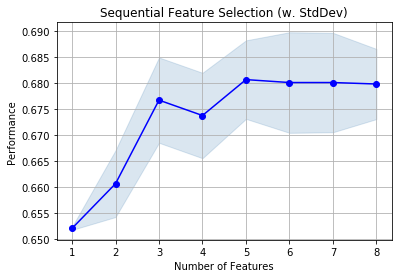

In [85]:
import matplotlib.pyplot as plt
# Initialise plot
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')

#plt.ylim([0.8, 1])
plt.title('Sequential Feature Selection (w. StdDev)')
plt.grid()
plt.show()

**So, 5 features are optimal by this method. The location of the feature can be found in the metridict() dataframe above.
The feature are indexed 2,4,6,7,8.**

In [86]:
print('Best features are : \n')
for i in (2, 4, 6, 7, 8):
    print(df_fine.columns[i])

Best features are : 

Feature4
Feature6
Feature8
ylabel
Famine


You can explore other options in mlxtend or here also. https://scikit-learn.org/stable/modules/feature_selection.html